# Week 10: Interactive Plotting using Plotly

**Sources:**

- https://plotly.com/python/

## 1. Import necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

# set the graphics style initially to defaul
plt.style.use('default')


## 1. Line Plots

In [3]:
# news data 
news = pd.read_csv('news.csv')
news.head()

,Year,Television,Newspaper,Internet,Radio
0,2001,74,45,13,18
1,2002,82,42,14,21
2,2003,80,50,20,18
3,2004,74,46,24,21
4,2005,73,36,20,16


In [4]:
# let's reshape the data to make it tidy. 
news = pd.melt(news, id_vars = 'Year', var_name = 'Source', value_name = 'Percent')
news.head()

,Year,Source,Percent
0,2001,Television,74
1,2002,Television,82
2,2003,Television,80
3,2004,Television,74
4,2005,Television,73


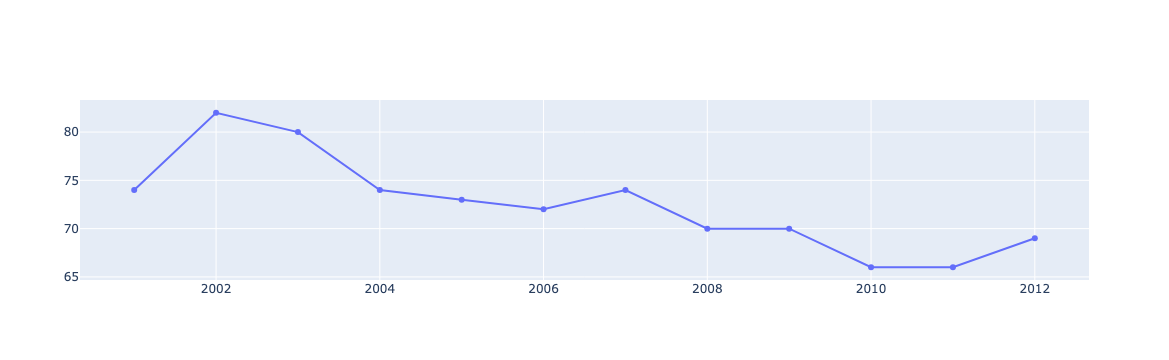

In [16]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = news.loc[news['Source'] == 'Television', 'Year'], 
                         y = news.loc[news['Source'] == 'Television', 'Percent'],
                         mode = 'lines+markers+text'
                         ))

fig.show()

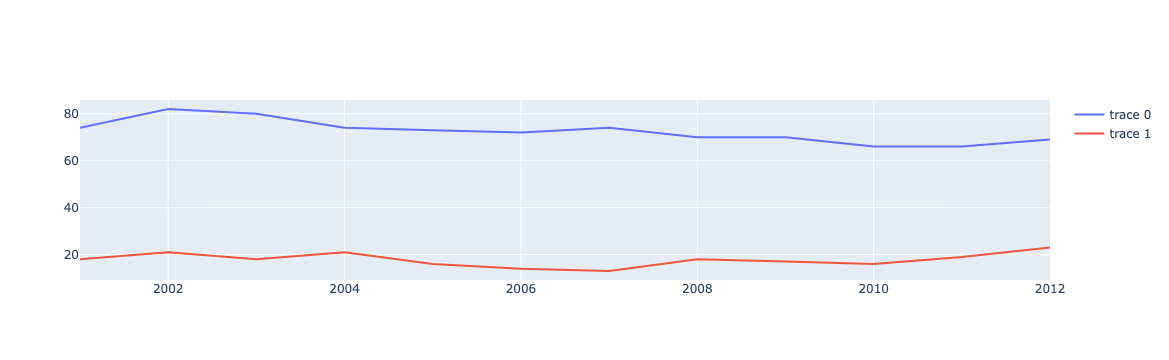

In [10]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = news.loc[news['Source'] == 'Television', 'Year'], 
                         y = news.loc[news['Source'] == 'Television', 'Percent'],
                         mode = 'lines'
                         ))
fig.add_trace(go.Scatter(x = news.loc[news['Source'] == 'Radio', 'Year'], 
                         y = news.loc[news['Source'] == 'Radio', 'Percent'],
                         mode = 'lines'
                         ))

fig.show()

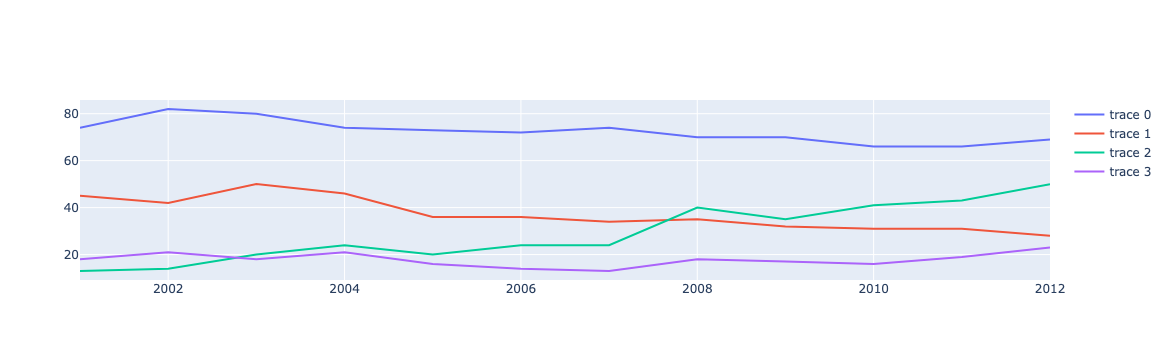

In [13]:
sources = news['Source'].unique()
colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']


fig = go.Figure()

for source, col in zip(sources, colors):
    
    plot_data = news[news['Source'] == source]
    
    fig.add_trace(go.Scatter(x = plot_data['Year'], 
                             y = plot_data['Percent'],
                             mode = 'lines', 
                             line = dict(color = col)
                             ))
    

fig.show()

In [8]:
x=pd.DataFrame(zip(sources,colors))
x


,0,1
0,Television,"rgb(67,67,67)"
1,Newspaper,"rgb(115,115,115)"
2,Internet,"rgb(49,130,189)"
3,Radio,"rgb(189,189,189)"


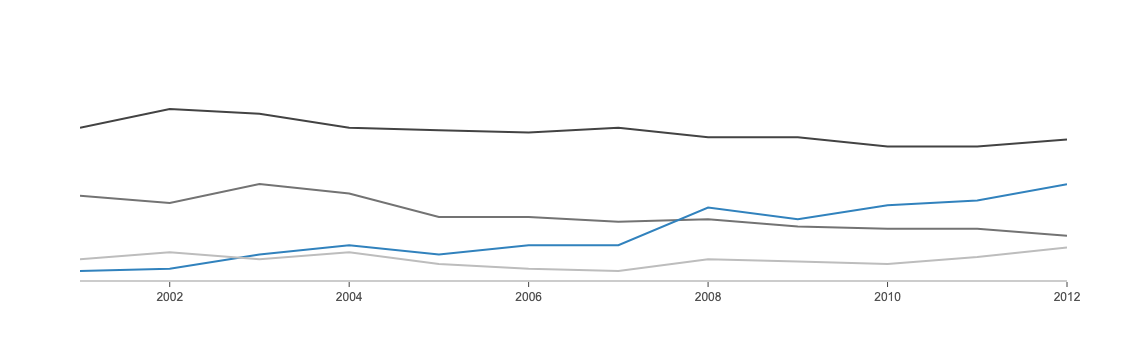

In [7]:
sources = news['Source'].unique()
colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']


fig = go.Figure()

for source, col in zip(sources, colors):
    
    plot_data = news[news['Source'] == source]
    
    fig.add_trace(go.Scatter(x = plot_data['Year'], 
                             y = plot_data['Percent'],
                             mode = 'lines', 
                             line = dict(color = col)
                             ))


fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        )
       ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),    
    plot_bgcolor='white',
    showlegend = False
)


fig.show()

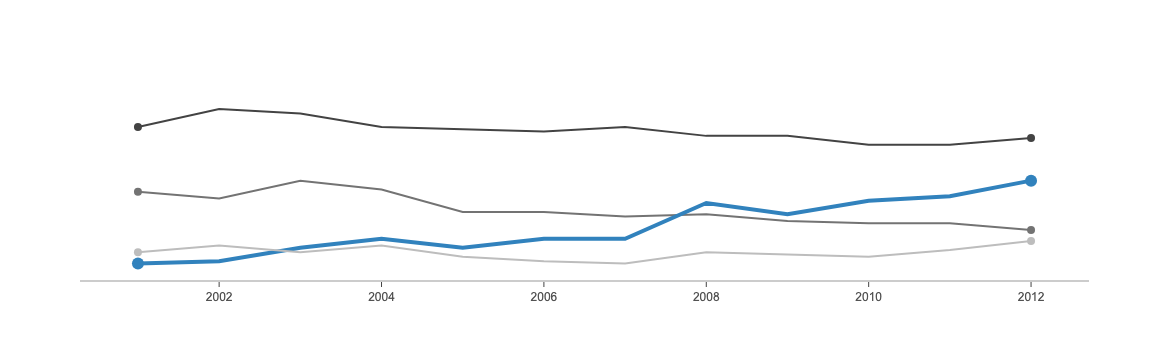

In [9]:
sources = news['Source'].unique()
colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']
point_sizes = [8, 8, 12, 8]
line_sizes = [2, 2, 4, 2]

fig = go.Figure()

for source, col, point_size, line_size in zip(sources, colors, point_sizes, line_sizes):
    
    plot_data = news[news['Source'] == source].reset_index()
    
    fig.add_trace(go.Scatter(x = plot_data['Year'], 
                             y = plot_data['Percent'],
                             mode = 'lines', 
                             line = dict(color = col, width = line_size)
                             ))
    
    end_points_x = [plot_data.loc[0, 'Year'], plot_data.loc[11, 'Year']]
    end_points_y = [plot_data.loc[0, 'Percent'], plot_data.loc[11, 'Percent']]
    
    fig.add_trace(go.Scatter(x = end_points_x,
                             y = end_points_y,
                             mode = 'markers',
                             marker = dict(color = col, size = point_size)))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        )
       ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),    
    plot_bgcolor='white',
    showlegend = False
)


fig.show()

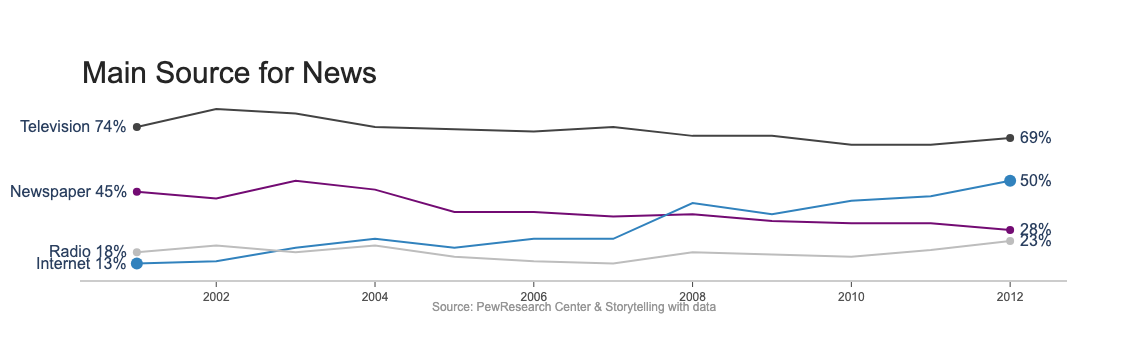

In [11]:
sources=news['Source'].unique()
colors=['rgb(67,67,67)','rgb(115,11,115)','rgb(49,130,189)','rgb(189,189,189)']
point_sizes=[8,8,12,8]
line_sizes=[2,2,4,2]

fig=go.Figure()

annotations=[]

for source, col,point_size,line_size in zip(sources,colors,point_sizes,line_sizes):
    
    plot_data=news[news['Source']==source].reset_index()
    
    
    fig.add_trace(go.Scatter(x=plot_data['Year'],
                            y=plot_data['Percent'],
                            mode='lines',
                            line=dict(color=col)
                            ))

    end_points_x=[plot_data.loc[0,'Year'],plot_data.loc[11,'Year']]
    end_points_y=[plot_data.loc[0,'Percent'],plot_data.loc[11,'Percent']]
   
    fig.add_trace(go.Scatter(x = end_points_x,
                             y = end_points_y,
                             mode = 'markers',
                             marker = dict(color = col, size = point_size)))
                  
    fig.update_layout(
        xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204,204,204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(family='Arial',size=12,
                 color='rgb(82,82,82)',
                     )),
         yaxis=dict(
             showgrid=False,
             zeroline=False,
             showline=False,
             showticklabels=False,
         ),
        plot_bgcolor='white',
        showlegend=False
    )
        
    annotations.append(dict(xref='paper',x=0.05,y=plot_data.loc[0,'Percent'],
                           xanchor='right',yanchor='middle',
                           text=source +' {}%'.format(plot_data.loc[0,'Percent']),
                           font=dict(family='Arial',
                                    size=16),
                           showarrow=False))       
                   
    annotations.append(dict(xref='paper', x=0.95, y=plot_data.loc[11,'Percent'],
                                  xanchor='left', yanchor='middle',
                                  text='{}%'.format(plot_data.loc[11,'Percent']),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))            
               
    
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Main Source for News',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: PewResearch Center & ' +
                                   'Storytelling with data',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)        

fig.show()

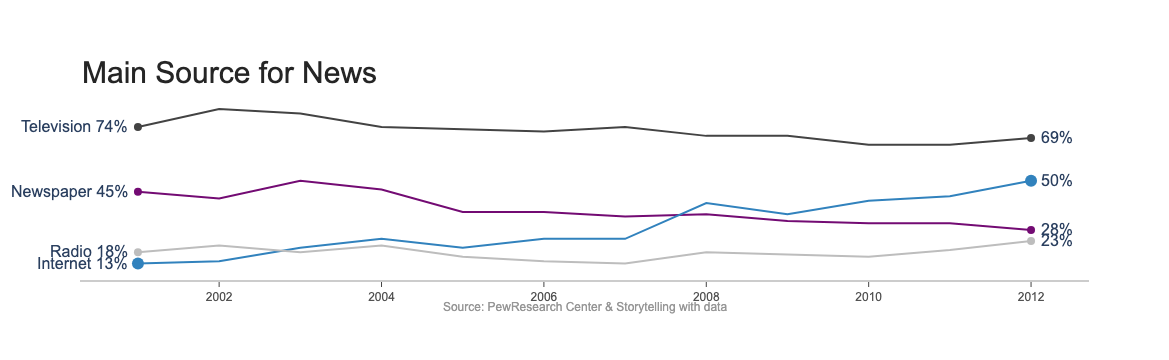

In [13]:
annotations = []

# Adding labels
for source, color in zip(sources, colors):
    
    plot_data = news[news['Source'] == source].reset_index()

    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=plot_data.loc[0,'Percent'],
                                  xanchor='right', yanchor='middle',
                                  text=source + ' {}%'.format(plot_data.loc[0,'Percent']),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
    
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=plot_data.loc[11,'Percent'],
                                  xanchor='left', yanchor='middle',
                                  text='{}%'.format(plot_data.loc[11,'Percent']),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))

    
    
# We are now outside the for loop

# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Main Source for News',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: PewResearch Center & ' +
                                   'Storytelling with data',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

## 2. Dot Plots 

### 2.1 Olympic Medals

In [14]:
df = px.data.medals_long()
df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


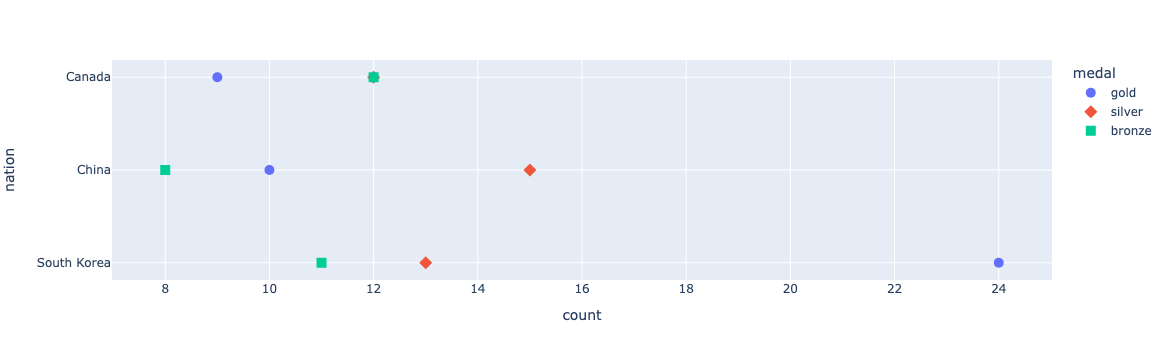

In [15]:
import plotly.express as px

df = px.data.medals_long()

fig = px.scatter(df, 
                 y="nation", x="count", 
                 color="medal", symbol="medal")

fig.update_traces(marker_size=10)

fig.show()

### 2.2. Gender Earning Disparity

In [16]:
import plotly.express as px
import pandas as pd

schools = ["Brown", "NYU", "Notre Dame", "Cornell", "Tufts", "Yale",
           "Dartmouth", "Chicago", "Columbia", "Duke", "Georgetown",
           "Princeton", "U.Penn", "Stanford", "MIT", "Harvard"]
n_schools = len(schools)

women_salary = [72, 67, 73, 80, 76, 79, 84, 78, 86, 93, 94, 90, 92, 96, 94, 112]
men_salary = [92, 94, 100, 107, 112, 114, 114, 118, 119, 124, 131, 137, 141, 151, 152, 165]


df = pd.DataFrame(dict(school=schools*2, 
                       salary=men_salary + women_salary,
                       gender=["Men"]*n_schools + ["Women"]*n_schools))

df.head()


,school,salary,gender
0,Brown,92,Men
1,NYU,94,Men
2,Notre Dame,100,Men
3,Cornell,107,Men
4,Tufts,112,Men


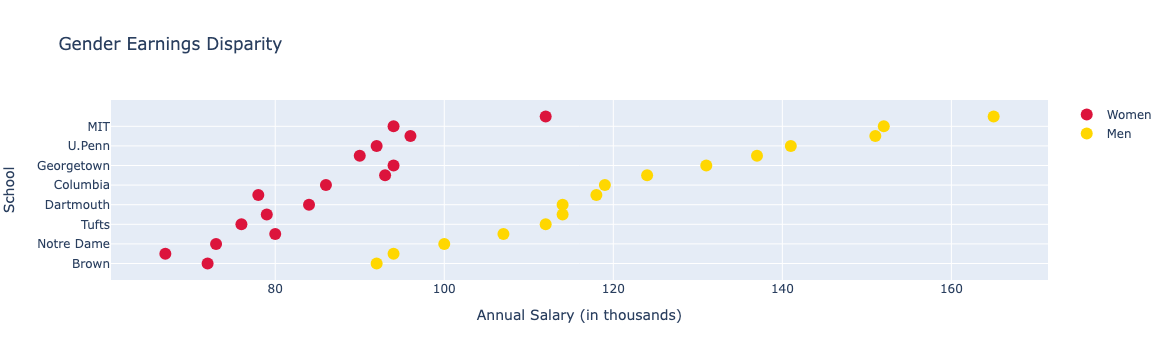

In [17]:
import plotly.graph_objects as go

schools = ["Brown", "NYU", "Notre Dame", "Cornell", "Tufts", "Yale",
           "Dartmouth", "Chicago", "Columbia", "Duke", "Georgetown",
           "Princeton", "U.Penn", "Stanford", "MIT", "Harvard"]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[72, 67, 73, 80, 76, 79, 84, 78, 86, 93, 94, 90, 92, 96, 94, 112],
    y=schools,
    marker=dict(color="crimson", size=12),
    mode="markers",
    name="Women",
))

fig.add_trace(go.Scatter(
    x=[92, 94, 100, 107, 112, 114, 114, 118, 119, 124, 131, 137, 141, 151, 152, 165],
    y=schools,
    marker=dict(color="gold", size=12),
    mode="markers",
    name="Men",
))

fig.update_layout(title="Gender Earnings Disparity",
                  xaxis_title="Annual Salary (in thousands)",
                  yaxis_title="School")

fig.show()

### 2.3 Style Categorical Dot Plot

In [18]:
import plotly.graph_objects as go

country = ['Switzerland (2011)', 'Chile (2013)', 'Japan (2014)',
           'United States (2012)', 'Slovenia (2014)', 'Canada (2011)',
           'Poland (2010)', 'Estonia (2015)', 'Luxembourg (2013)', 'Portugal (2011)']
voting_pop = [40, 45.7, 52, 53.6, 54.1, 54.2, 54.5, 54.7, 55.1, 56.6]
reg_voters = [49.1, 42, 52.7, 84.3, 51.7, 61.1, 55.3, 64.2, 91.1, 58.9]

df = pd.DataFrame({'country':country, 
                   'voting_pop': voting_pop, 
                   'reg_voters': reg_voters})

df.head()


,country,voting_pop,reg_voters
0,Switzerland (2011),40.0,49.1
1,Chile (2013),45.7,42.0
2,Japan (2014),52.0,52.7
3,United States (2012),53.6,84.3
4,Slovenia (2014),54.1,51.7


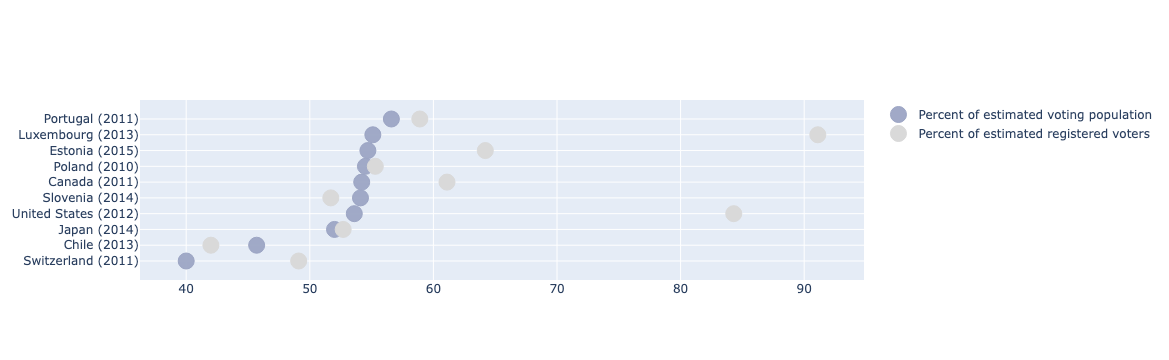

In [19]:
fig = go.Figure()

# add scatter dots for percentage of voting age population
fig.add_trace(go.Scatter(
  x=df.voting_pop,
  y=df.country,
  name='Percent of estimated voting population',
  marker=dict(
     color='rgba(156,165,196,0.95)',
     line_color='rgba(156,165,196,1.0)',
  )
))

fig.add_trace(go.Scatter(
     x=df.reg_voters,
     y=df.country,
     name='Percent of estimated registered voters',
     marker=dict(
         color='rgba(217,217,217,1.0)',
         line_color='rgba(217,217,217,1.0)'
     )))

fig.update_traces(mode='markers',
                 marker=dict(line_width=1,symbol='circle',size=16))
                             
fig.show()

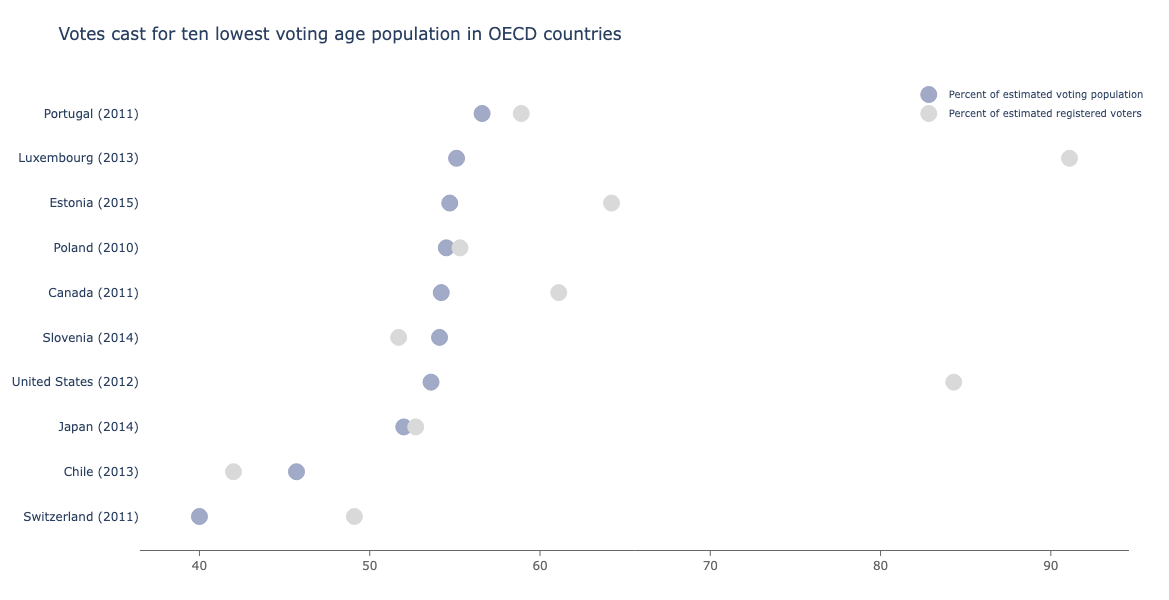

In [20]:
fig = go.Figure()

# add scatter dots for percentage of voting age population
fig.add_trace(go.Scatter(
  x=df.voting_pop,
  y=df.country,
  name='Percent of estimated voting population',
  marker=dict(
     color='rgba(156,165,196,0.95)',
     line_color='rgba(156,165,196,1.0)',
  )
))

fig.add_trace(go.Scatter(
     x=df.reg_voters,
     y=df.country,
     name='Percent of estimated registered voters',
     marker=dict(
         color='rgba(217,217,217,1.0)',
         line_color='rgba(217,217,217,1.0)'
     )))

fig.update_traces(mode='markers',
                 marker=dict(line_width=1,symbol='circle',size=16))


fig.update_layout(
   title='Votes cast for ten lowest voting age population in OECD countries',
   xaxis=dict(
       showgrid=False,
       showline=True,
       linecolor='rgb(102,102,102)',
       tickfont_color='rgb(102,102,102)',
       showticklabels=True,
       dtick=10,
       ticks='outside',
       tickcolor='rgb(102,102,102)',
   ),
   margin=dict(l=140, r=40, b=50, t=80),
   legend=dict(
      font_size=10,
      yanchor='top',
      xanchor='right',
      bgcolor='white',
      bordercolor='white',
      borderwidth=0
   ),
   width=800,
   height=600,
   paper_bgcolor='white',
   plot_bgcolor='white',
   hovermode='closest',
)
    
fig.show()

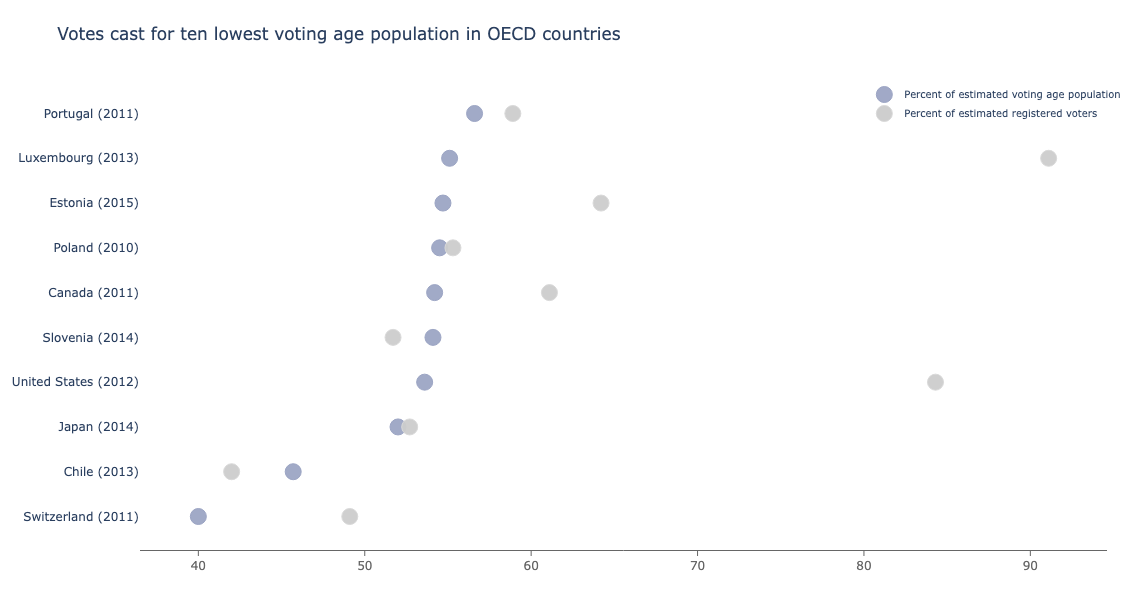

In [21]:
fig = go.Figure()

# add scatter dots for percentage of voting age population
fig.add_trace(go.Scatter(
    x=df.voting_pop,
    y=df.country,
    name='Percent of estimated voting age population',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line_color='rgba(156, 165, 196, 1.0)',
    )
))

# add scatter dots for the percentage of registered voters
fig.add_trace(go.Scatter(
    x = df.reg_voters, 
    y = df.country, 
    name='Percent of estimated registered voters',
    marker=dict(
        color='rgba(204, 204, 204, 0.95)',
        line_color='rgba(217, 217, 217, 1.0)'
    )))

# update how the dots (markers) look
fig.update_traces(mode='markers', 
                  marker=dict(line_width=1, symbol='circle', size=16))


fig.update_layout(
    title="Votes cast for ten lowest voting age population in OECD countries",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10, # show ticks every 10 units on the axis
        ticks='outside', # ticks pointing outside
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80), # lenght of left, right, bottom, and top margins
    
    # legends have an anchor point set to a point within the legend
    legend=dict(
        font_size=10,
        yanchor='top',
        xanchor='right',
        bgcolor = 'white', 
        bordercolor  = 'white',
        borderwidth = 0
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)

fig.show()

## 3. Horizontal Bar chart

### 3.1 General Barplots

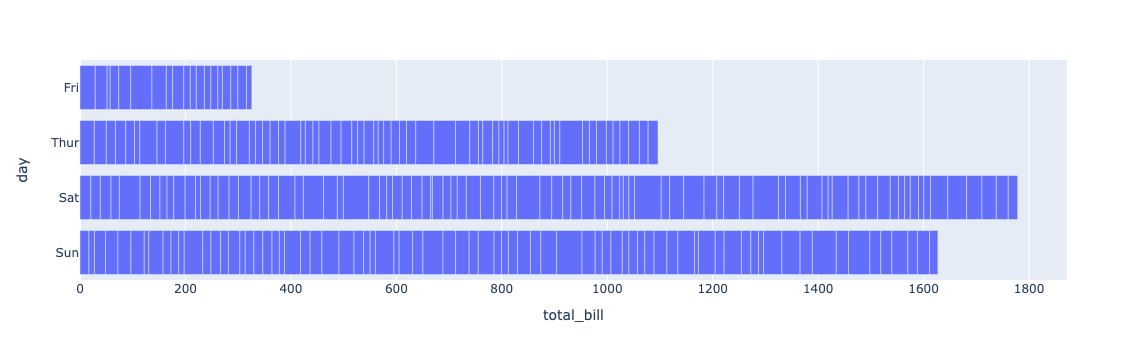

In [22]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="total_bill", y="day", orientation='h')
fig.show()

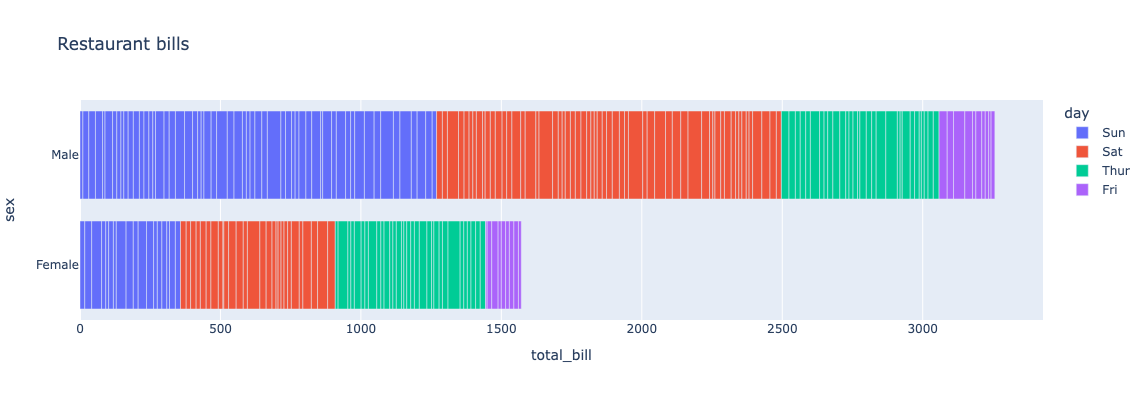

In [23]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="total_bill", y="sex", color='day', orientation='h',
             hover_data=["tip", "size"],
             height=400,
             title='Restaurant bills')
fig.show()

### 3.2 Survery Data Visualization

In [24]:
# 1. Create the data
import plotly.graph_objects as go

top_labels = ['Strongly<br>agree', 'Agree', 'Neutral', 'Disagree',
              'Strongly<br>disagree']

# colors are arranged from darkets to lightest
colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

# each list have the distribution of responses 
x_data = [[21, 30, 21, 16, 12],
          [24, 31, 19, 15, 11],
          [27, 26, 23, 11, 13],
          [29, 24, 15, 18, 14]]

# the list of questions
y_data = ['The course was effectively<br>organized',
          'The course developed my<br>abilities and skills for<br>the subject', 
          'The course developed my<br>ability to think critically about<br>the subject',
          'I would recommend this<br>course to a friend']


In [27]:
# 1. Create the data
import plotly.graph_objects as go

top_labels = ['Strongly<br>agree', 'Agree', 'Neutral', 'Disagree',
              'Strongly<br>disagree']

# colors are arranged from darkets to lightest
colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

# each list have the distribution of responses 
x_data = [[21, 30, 21, 16, 12],
          [24, 31, 19, 15, 11],
          [27, 26, 23, 11, 13],
          [29, 24, 15, 18, 14]]

# the list of questions
y_data = ['The course was effectively<br>organized',
          'The course developed my<br>abilities and skills for<br>the subject', 
          'The course developed my<br>ability to think critically about<br>the subject',
          'I would recommend this<br>course to a friend']

             

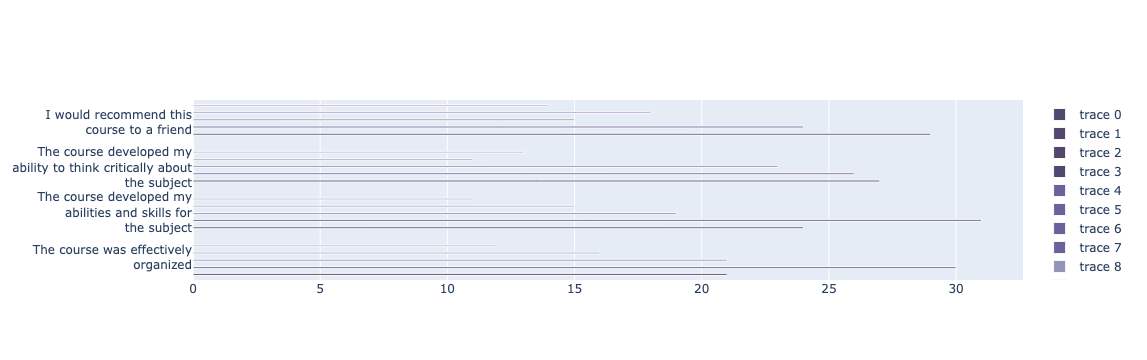

In [28]:
# 2. For each question in the survey, create a mini barchart representing responses of agreement

fig = go.Figure()

# outer loop: 5 times (scale: Strongly agree, Agree, etc.)
# inner loop: 4 times (4 questions each with a list of responses)
# for each of the 5 scales (i), and for each question (yd) with its list of responses (xd[i]):
#   # Create a barchart for each question and its corresponding list of 5 ratings


for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.show()



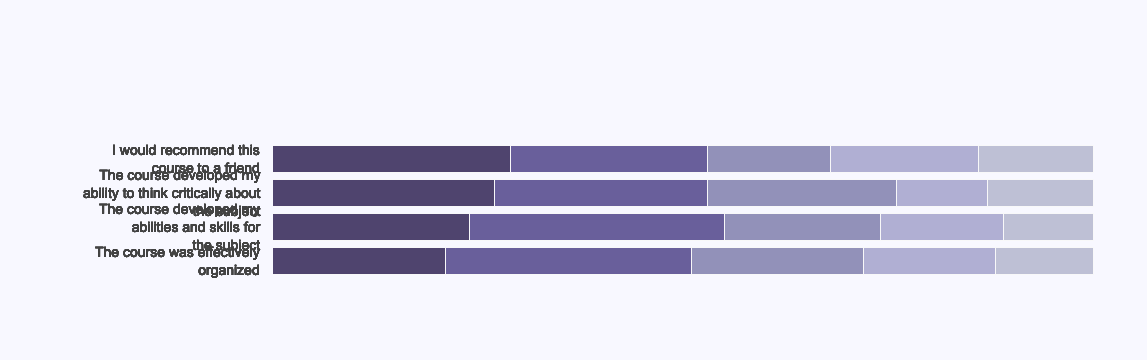

In [32]:
# 3. Update Barchart type to Stacked

# update the layout of the figure: 
# 1. get rid of all grids, lines, ticklabels on both x and y axis 
# 2. update the bar chart to a stack barchart using `barmode = 'stack'`
# 3. get rid of the legend 
# 4. update the margines lengths
# 5. set the plot and paper background color to white

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack', # change type of barchart to stacked
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)



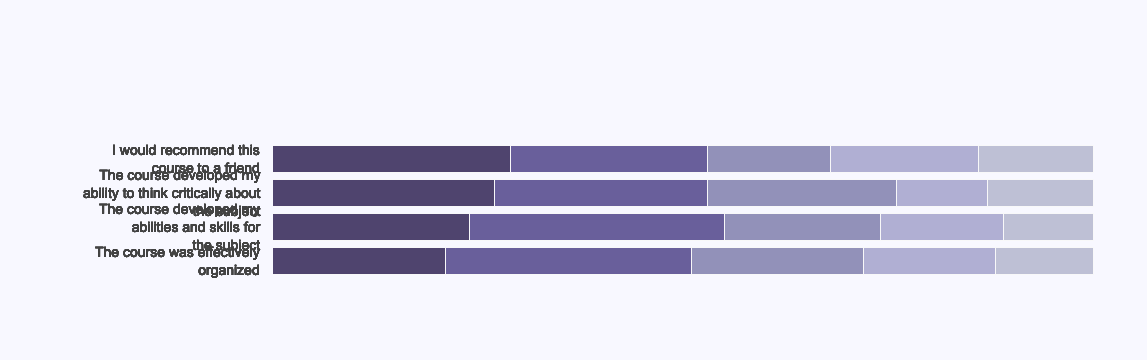

In [33]:
# 4. Add annotations Questions (y labels )

annotations = []
for yd, xd in zip(y_data, x_data):
    # labeling the y-axis: questions
    annotations.append(dict(xref='paper', #x = 0.14 in referance to the whole figure (paper)
                            yref='y', # y= yd in reference to the regular y axis on the plot
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    

fig.update_layout(annotations=annotations)
fig.show()
    

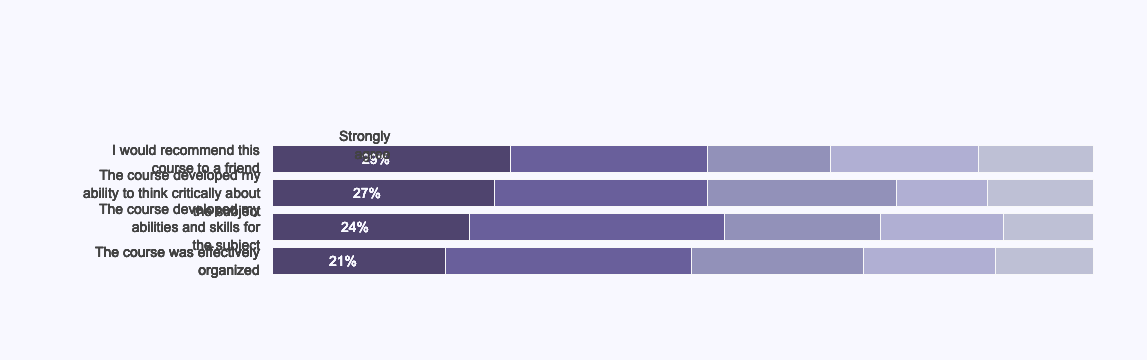

In [34]:
# 5. Add the first Likert scale Label and the corresponding responses 

# We need to have a starting point and then we loop over the rest of the scales and responses (step 6)
# This was we can use the first response as a pivot and measure from there to the next scale position

annotations = []
for yd, xd in zip(y_data, x_data):
    # labeling the y-axis: questions
    annotations.append(dict(xref='paper', #x = 0.14 in referance to the whole figure (paper)
                            yref='y', # y= yd in reference to the regular y axis on the plot
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    
    # # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd, # to center the position for x, divide by 2
                            text=str(xd[0]) + '%', # this is the real value of x (the one to show)
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))

    #labeling the first Likert scale (on the top)
    if yd == y_data[-1]: # refering to the top question on the figure
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                            color='rgb(67, 67, 67)'),
                                showarrow=False))
    


fig.update_layout(annotations=annotations)
fig.show()
    

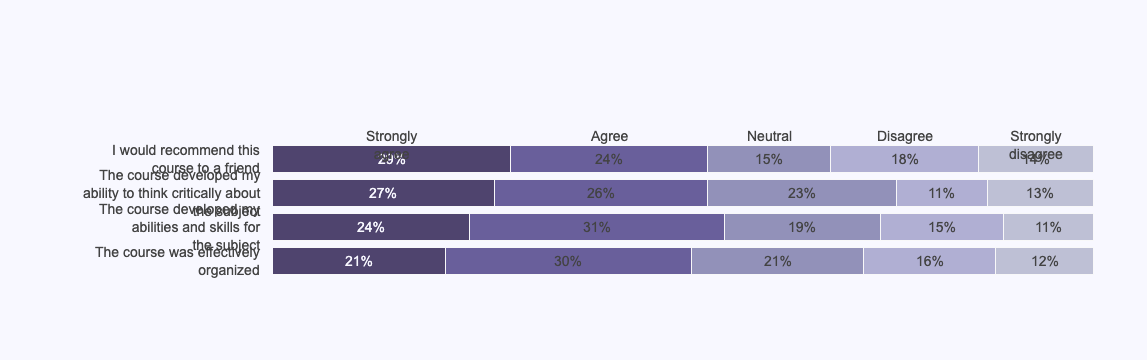

In [35]:
# 1. Create the data
import plotly.graph_objects as go

top_labels = ['Strongly<br>agree', 'Agree', 'Neutral', 'Disagree',
              'Strongly<br>disagree']

# colors are arranged from darkets to lightest
colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

# each list have the distribution of responses 
x_data = [[21, 30, 21, 16, 12],
          [24, 31, 19, 15, 11],
          [27, 26, 23, 11, 13],
          [29, 24, 15, 18, 14]]

# the list of questions
y_data = ['The course was effectively<br>organized',
          'The course developed my<br>abilities and skills for<br>the subject', 
          'The course developed my<br>ability to think critically about<br>the subject',
          'I would recommend this<br>course to a friend']

fig=go.Figure()

for i in range(0,len(x_data[0])):
    for xd, yd in zip(x_data,y_data):
        fig.add_trace(go.Bar(
        x=[xd[i]],y=[yd],
        orientation='h',
        marker=dict(
            color=colors[i],
            line=dict(color='rgb(248,248,249)',width=1)
        )
    ))
        
        
fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack', # change type of barchart to stacked
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

    
annotations=[]

for yd, xd in zip(y_data, x_data):
    annotations.append(dict(xref='paper',
                           yref='y',
                           x=0.14,y=yd,
                           xanchor='right',
                           text=str(yd),
                           font=dict(family='Arial',size=14,
                                    color='rgb(67,67,67)'),
                           showarrow=False, align='right'))
    

    annotations.append(dict(xref='x', yref='y',
                           x=xd[0]/2, y=yd,
                           text=str(xd[0]) + '%',
                           font=dict(family='Arial',size=14,
                                    color='rgb(248,248,255)'),
                           showarrow=False))
    
    if yd==y_data[-1]:
        annotations.append(dict(xref='x',yref='paper',
                               x=xd[0]/2, y=1.1,
                               text=top_labels[0],
                               font=dict(family='Arial',size=14,
                                        color='rgb(67,67,67)'),
                               showarrow=False))
    space=xd[0]
    for i in range(1, len(xd)):
            annotations.append(dict(xref='x',yref='y',
                               x=space+ (xd[i]/2), y=yd,
                               text=str(xd[i]) + '%',
                               font=dict(family="Arial", size=14,
                                         color='rgb(67,67,67)'),
                                showarrow=False))
 
      # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
                
            space += xd[i]


fig.update_layout(annotations=annotations)

fig.show()
        
    
    
    
   
       

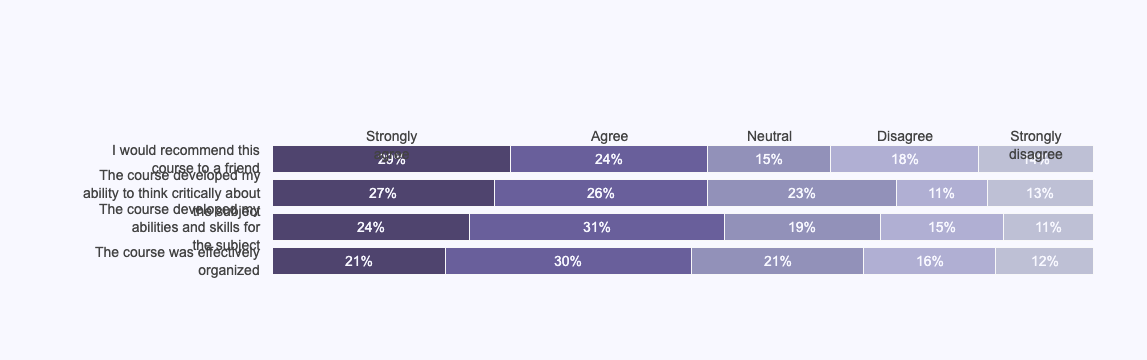

In [36]:
# 6. Label the rest of responses

annotations = []
for yd, xd in zip(y_data, x_data):
    # labeling the y-axis: questions
    annotations.append(dict(xref='paper', #x = 0.14 in referance to the whole figure (paper)
                            yref='y', # y= yd in reference to the regular y axis on the plot
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    
    
    # # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd, # to center the position for x, divide by 2
                            text=str(xd[0]) + '%', # this is the real value of x (the one to show)
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))

    #labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                            color='rgb(67, 67, 67)'),
                                showarrow=False))
    
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]



fig.update_layout(annotations=annotations)
fig.show()

#### Full Code

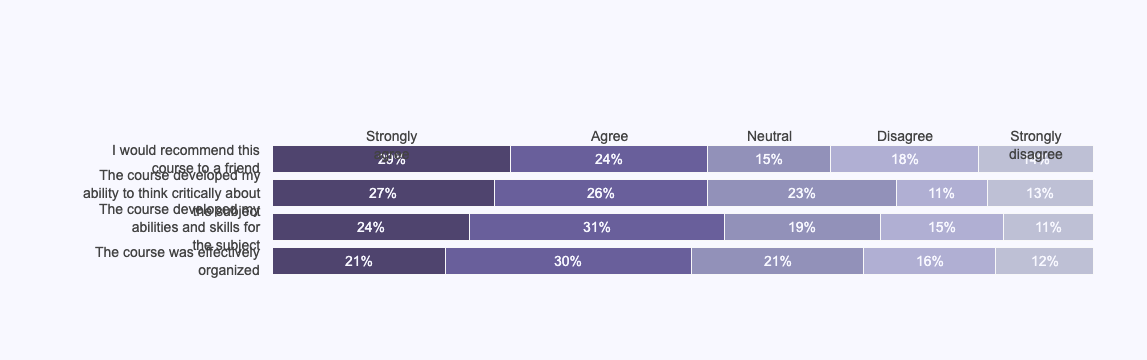

In [138]:
import plotly.graph_objects as go

top_labels = ['Strongly<br>agree', 'Agree', 'Neutral', 'Disagree',
              'Strongly<br>disagree']

# colors are arranged from darkets to lightest
colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

# each list have the distribution of responses 
x_data = [[21, 30, 21, 16, 12],
          [24, 31, 19, 15, 11],
          [27, 26, 23, 11, 13],
          [29, 24, 15, 18, 14]]

# the list of questions
y_data = ['The course was effectively<br>organized',
          'The course developed my<br>abilities and skills ' +
          'for<br>the subject', 'The course developed ' +
          'my<br>ability to think critically about<br>the subject',
          'I would recommend this<br>course to a friend']

fig = go.Figure()

# outer loop: 5 times (scale: Strongly agree, Agree, etc.)
# inner loop: 4 times (4 questions each with a list of responses)
# for each of the 5 scales (i), and for each question (yd) with its list of responses (xd[i]):
#   # Create a barchart for each question and its corresponding list of 5 ratings


for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

# update the layout of the figure: 
# 1. get rid of all grids, lines, ticklabels on both x and y axis 
# 2. update the bar chart to a stack barchart using `barmode = 'stack'`
# 3. get rid of the legend 
# 4. update the margines lengths
# 5. set the plot and paper background color to white

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack', # change type of barchart to stacked
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)


# let's add the annotations to each 'box' on the graph
# add labels for the axes

annotations = []
for yd, xd in zip(y_data, x_data):
    # labeling the y-axis: questions
    annotations.append(dict(xref='paper', #x = 0.14 in referance to the whole figure (paper)
                            yref='y', # y= yd in reference to the regular y axis on the plot
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    
    
    # # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd, # to center the position for x, divide by 2
                            text=str(xd[0]) + '%', # this is the real value of x (the one to show)
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))

    #labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                            color='rgb(67, 67, 67)'),
                                showarrow=False))
    
    # In the following loop, we go over the rest of labels
    space = xd[0] # how much space is needed between each label (Strongly agree, agree, etc.)
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                                color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                    color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)


fig.show()

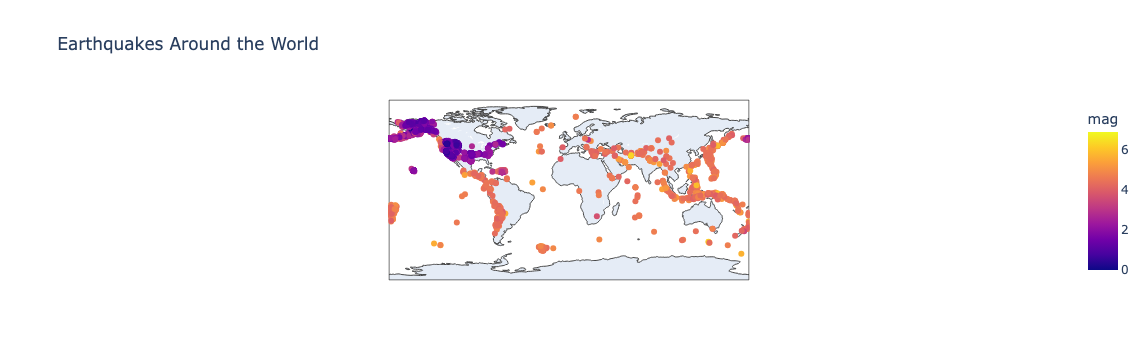

## 5. Parallel Categories Diagram

## 6. Parallel Coordinates Plot